# The road severity

### A supervised machine learning model to predict the severity of the accident.


In [ ]:
#importing libraries.
import pandas as pd
import numpy as np

In [ ]:
print('Hello Capstone Project Course')

### Importing data from CSV file.


In [53]:
!wget -O loan_train.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-11 12:05:54--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 73,917,638  1.24MB/s   in 34s    

2020-09-11 12:06:30 (2.06 MB/s) - ‘loan_train.csv’ saved [73917638/73917638]



In [ ]:
df = pd.read_csv('loan_train.csv')
df.head()

In [54]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [55]:
df.columns.values


array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

## Cleaning of data

### Now we drop the unwanted columns 


In [56]:
df_filtered = df[["SEVERITYCODE","ADDRTYPE","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND"]]


In [57]:
df_filtered.head()

,SEVERITYCODE,ADDRTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,At Intersection (intersection related),Overcast,Wet,Daylight
1,1,Block,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,1,Block,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,1,Block,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,2,Intersection,At Intersection (intersection related),Raining,Wet,Daylight


In [59]:
df_filtered.shape

(194673, 6)

In [60]:
df_filtered.ADDRTYPE.unique()

array(['Intersection', 'Block', 'Alley', nan], dtype=object)

In [20]:
df_filtered[df_filtered["ADDRTYPE"].isnull()]

,SEVERITYCODE,ADDRTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
74,1,NaN,Mid-Block (not related to intersection),Clear,Dry,Daylight
171,1,NaN,NaN,Clear,Dry,Daylight
268,1,NaN,Mid-Block (not related to intersection),Clear,Dry,Dark - Street Lights On
355,1,NaN,NaN,Clear,Dry,Daylight
412,1,NaN,Unknown,Clear,Dry,Daylight
715,1,NaN,NaN,Overcast,Wet,Dark - Street Lights On
1023,1,NaN,NaN,Unknown,Unknown,Unknown
1120,2,NaN,NaN,Clear,Dry,Daylight
1216,1,NaN,NaN,Overcast,Dry,Dusk
1218,1,NaN,NaN,Clear,Unknown,Daylight


In [78]:
df_na_dropped = df_filtered.dropna()

In [62]:
df_na_dropped.shape

(182914, 6)

In [63]:
df_na_dropped.head()

,SEVERITYCODE,ADDRTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,At Intersection (intersection related),Overcast,Wet,Daylight
1,1,Block,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,1,Block,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,1,Block,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,2,Intersection,At Intersection (intersection related),Raining,Wet,Daylight


In [79]:
df_na_dropped.ADDRTYPE.unique()

array(['Intersection', 'Block', 'Alley'], dtype=object)

In [80]:
df_na_dropped.dtypes

SEVERITYCODE     int64
ADDRTYPE        object
JUNCTIONTYPE    object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

### To transform the categorical values to numerical values

In [81]:
df_na_dropped.JUNCTIONTYPE.unique()

array(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'At Intersection (but not related to intersection)',
       'Ramp Junction'], dtype=object)

In [82]:
df_na_dropped.WEATHER.unique()

array(['Overcast', 'Raining', 'Clear', 'Snowing', 'Other',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [83]:
df_na_dropped.ROADCOND.unique()

array(['Wet', 'Dry', 'Snow/Slush', 'Ice', 'Other', 'Sand/Mud/Dirt',
       'Standing Water', 'Oil'], dtype=object)

In [84]:
df_na_dropped.LIGHTCOND.unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting'], dtype=object)

#### First we have to delete the rows with unknown values

In [85]:
df_na_dropped.drop( df_na_dropped[ df_na_dropped['JUNCTIONTYPE'] == "Unknown" ].index , inplace=True)

In [86]:
df_na_dropped.drop( df_na_dropped[ df_na_dropped['WEATHER'] == "Unknown" ].index , inplace=True)

In [87]:
df_na_dropped.drop( df_na_dropped[ df_na_dropped['ROADCOND'] == "Unknown" ].index , inplace=True)

In [88]:
df_na_dropped.drop( df_na_dropped[ df_na_dropped['LIGHTCOND'] == "Unknown" ].index , inplace=True)

#### matching the number of records for the severity 1 and 2 

In [116]:
df_severity_1 = df_na_dropped[df_na_dropped['SEVERITYCODE']==1]

In [117]:
df_severity_2 = df_na_dropped[df_na_dropped['SEVERITYCODE']==2]

In [118]:
df_severity_1_sampling = df_severity_1.sample(n=56000)  ## there are about 50k fewer records for severity 2 , so to balance the no of records in the dataset we will take around 56k records for severity 1

In [119]:
df_final_sampling = pd.concat([df_severity_1_sampling,df_severity_2])


In [120]:
df_final_sampling['SEVERITYCODE'].value_counts()

1    56000
2    55485
Name: SEVERITYCODE, dtype: int64

In [121]:
X_svm = df_final_sampling[["ADDRTYPE","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND"]].values

In [122]:
X_svm[0:5]

array([['Block', 'Mid-Block (not related to intersection)', 'Clear',
        'Dry', 'Daylight'],
       ['Block', 'Mid-Block (not related to intersection)', 'Clear',
        'Dry', 'Daylight'],
       ['Intersection', 'At Intersection (intersection related)',
        'Clear', 'Dry', 'Daylight'],
       ['Intersection', 'At Intersection (intersection related)',
        'Clear', 'Dry', 'Daylight'],
       ['Block', 'Mid-Block (but intersection related)', 'Raining',
        'Wet', 'Daylight']], dtype=object)

In [123]:
X_svm[:,0]

array(['Block', 'Block', 'Intersection', ..., 'Block', 'Intersection',
       'Intersection'], dtype=object)

In [124]:
from sklearn import preprocessing

le_ADDRTYPE = preprocessing.LabelEncoder()
le_ADDRTYPE.fit(['Intersection','Block','Alley',])
X_svm[:,0] = le_ADDRTYPE.transform(X_svm[:,0]) 

le_JUNCTIONTYPE = preprocessing.LabelEncoder()
le_JUNCTIONTYPE.fit(['At Intersection (intersection related)','Mid-Block (not related to intersection)','Driveway Junction',
                     'Mid-Block (but intersection related)','At Intersection (but not related to intersection)','Ramp Junction'])
X_svm[:,1] = le_JUNCTIONTYPE.transform(X_svm[:,1]) 


le_WEATHER = preprocessing.LabelEncoder()
le_WEATHER.fit([ 'Overcast', 'Raining', 'Clear','Other','Snowing','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'])
X_svm[:,2] = le_WEATHER.transform(X_svm[:,2])


le_ROADCOND = preprocessing.LabelEncoder()
le_ROADCOND.fit([ 'Wet', 'Dry','Snow/Slush','Ice','Other','Sand/Mud/Dirt','Standing Water','Oil'])
X_svm[:,3] = le_ROADCOND.transform(X_svm[:,3]) 


le_LIGHTCOND = preprocessing.LabelEncoder()
le_LIGHTCOND.fit([ 'Daylight', 'Dark - Street Lights On','Dark - No Street Lights','Dusk','Dawn','Dark - Street Lights Off', 'Other','Dark - Unknown Lighting'])
X_svm[:,4] = le_LIGHTCOND.transform(X_svm[:,4]) 

X_svm[0:5]


array([[1, 4, 1, 0, 5],
       [1, 4, 1, 0, 5],
       [2, 1, 1, 0, 5],
       [2, 1, 1, 0, 5],
       [1, 3, 6, 7, 5]], dtype=object)

In [125]:
y_svm = df_final_sampling['SEVERITYCODE']
y_svm[0:5]

56745     1
125281    1
186466    1
93721     1
12467     1
Name: SEVERITYCODE, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split( X_svm, y_svm, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (89188, 5) (89188,)
Test set: (22297, 5) (22297,)


In [128]:
from sklearn import svm

clf = svm.SVC(kernel='rbf',gamma='auto')
print("fitting started")
clf.fit(X_train, y_train) 
print("fitting ended")

fitting started
fitting ended


In [129]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 2, 1, 2, 2])

### Evaluation


In [130]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline 
import matplotlib.pyplot as plt

In [105]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

              precision    recall  f1-score   support

           1       0.58      0.67      0.62     11130
           2       0.61      0.51      0.56     11167

   micro avg       0.59      0.59      0.59     22297
   macro avg       0.59      0.59      0.59     22297
weighted avg       0.59      0.59      0.59     22297

Confusion matrix, without normalization
[[7424 3706]
 [5427 5740]]


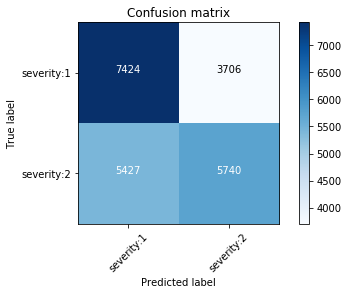

In [131]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity:1','severity:2'],normalize= False,  title='Confusion matrix')

In [132]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.5879918325503074

In [133]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.5903933264564739

In [134]:
from sklearn import svm

clf_linear = svm.SVC(kernel='linear',gamma='auto')
print("fitting started")
clf_linear.fit(X_train, y_train) 
print("fitting ended")

fitting started
fitting ended


In [135]:
yhat_svm_linear = clf_linear.predict(X_test)
yhat_svm_linear [0:5]

array([2, 2, 1, 1, 2])

              precision    recall  f1-score   support

           1       0.57      0.70      0.63     11130
           2       0.61      0.48      0.54     11167

   micro avg       0.59      0.59      0.59     22297
   macro avg       0.59      0.59      0.58     22297
weighted avg       0.59      0.59      0.58     22297

Confusion matrix, without normalization
[[7745 3385]
 [5767 5400]]


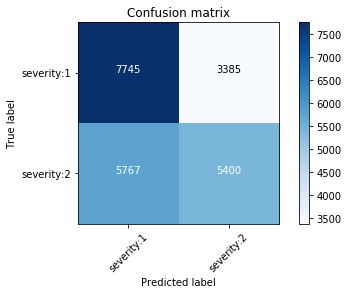

In [136]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_svm_linear, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_svm_linear))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity:1','severity:2'],normalize= False,  title='Confusion matrix')

In [184]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_svm_linear, average='weighted')

0.5848779106656709

In [185]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_svm_linear)

0.5895411938825851

## decision tree

In [139]:
from sklearn.tree import DecisionTreeClassifier
SeverityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
SeverityTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [141]:
SeverityTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [143]:
predTree = SeverityTree.predict(X_test)

In [144]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.5894963447997489


### KNN 

In [186]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [187]:
X = preprocessing.StandardScaler().fit(X_svm).transform(X_svm.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.8 ,  1.04, -0.71, -0.63,  0.59],
       [-0.8 ,  1.04, -0.71, -0.63,  0.59],
       [ 1.24, -1.13, -0.71, -0.63,  0.59],
       [ 1.24, -1.13, -0.71, -0.63,  0.59],
       [-0.8 ,  0.32,  1.68,  1.61,  0.59]])

In [188]:
from sklearn.model_selection import train_test_split
X_train_trfr, X_test_trfr, y_train_trfr, y_test_trfr = train_test_split( X, y_svm, test_size=0.2, random_state=4)
print ('Train set:', X_train_trfr.shape,  y_train_trfr.shape)
print ('Test set:', X_test_trfr.shape,  y_test_trfr.shape)

Train set: (89188, 5) (89188,)
Test set: (22297, 5) (22297,)


In [189]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_trfr,y_train_trfr)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [190]:
yhat_knn = neigh.predict(X_test_trfr)
yhat_knn[0:5]

array([2, 2, 1, 2, 2])

In [191]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train_trfr, neigh.predict(X_train_trfr)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test_trfr, yhat_knn))

print(f1_score(y_test_trfr, yhat_knn, average='weighted'))
print(jaccard_similarity_score(y_test_trfr, yhat_knn))

Train set Accuracy:  0.565176929631789
Test set Accuracy:  0.5678342377898372
0.5662552317681372
0.5678342377898372


## Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_trfr,y_train_trfr)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [193]:
yhat = LR.predict(X_test_trfr)
yhat

array([2, 2, 1, ..., 1, 1, 1])

In [194]:
yhat_prob = LR.predict_proba(X_test_trfr)
yhat_prob

array([[0.42, 0.58],
       [0.39, 0.61],
       [0.58, 0.42],
       ...,
       [0.59, 0.41],
       [0.5 , 0.5 ],
       [0.61, 0.39]])

In [195]:
from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test_trfr, yhat))
print(f1_score(y_test_trfr, yhat, average='weighted'))

0.5888236085572051
0.5871790636935581


Confusion matrix, without normalization
[[7259 3871]
 [5297 5870]]


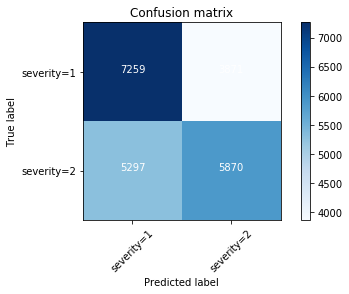

In [162]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_trfr, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity=1','severity=2'],normalize= False,  title='Confusion matrix')

In [163]:
print (classification_report(y_test_trfr, yhat))


              precision    recall  f1-score   support

           1       0.58      0.65      0.61     11130
           2       0.60      0.53      0.56     11167

   micro avg       0.59      0.59      0.59     22297
   macro avg       0.59      0.59      0.59     22297
weighted avg       0.59      0.59      0.59     22297



In [164]:
from sklearn.metrics import log_loss
log_loss(y_test_trfr, yhat_prob)

0.673817823166394

### Gradient Boosting Classifier

In [183]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gbc = GradientBoostingClassifier(loss="deviance", learning_rate=0.1, 
      n_estimators=100, subsample=1.0, criterion="friedman_mse", 
      min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
      max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, 
      random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, 
      presort="auto")

y_pred = gbc.fit(X_train, y_train.values.ravel()).predict(X_test)
print(format(classification_report(y_test, y_pred)))
print(accuracy_score(y_test, y_pred))

print(f1_score(y_test, y_pred, average='weighted'))
print(jaccard_similarity_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      0.67      0.62     11130
           2       0.61      0.51      0.55     11167

   micro avg       0.59      0.59      0.59     22297
   macro avg       0.59      0.59      0.59     22297
weighted avg       0.59      0.59      0.59     22297

0.5908418172848365
0.5879675398929578
0.5908418172848365


### XG Boost 

In [181]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate =0.07, n_estimators=300,
                      class_weight="balanced_subsample",
                      max_depth=8, min_child_weight=1,
                      scale_pos_weight=7,
                      seed=27,subsample=0.8,colsample_bytree=0.8)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5017266896891959


In [182]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred, average='weighted'))
print(jaccard_similarity_score(y_test, y_pred))

[[   30 11100]
 [   10 11157]]
              precision    recall  f1-score   support

           1       0.75      0.00      0.01     11130
           2       0.50      1.00      0.67     11167

   micro avg       0.50      0.50      0.50     22297
   macro avg       0.63      0.50      0.34     22297
weighted avg       0.63      0.50      0.34     22297

0.3370372835401985
0.5017266896891959


### Random Forest Classifier

In [180]:
from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier(n_estimators=300,random_state=35)

rdf.fit(X_train,y_train)

y_pred=rdf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred, average='weighted'))
print(jaccard_similarity_score(y_test, y_pred))

Accuracy: 0.5929497241781405
[[6773 4357]
 [4719 6448]]
              precision    recall  f1-score   support

           1       0.59      0.61      0.60     11130
           2       0.60      0.58      0.59     11167

   micro avg       0.59      0.59      0.59     22297
   macro avg       0.59      0.59      0.59     22297
weighted avg       0.59      0.59      0.59     22297

0.5928533769119024
0.5929497241781405


In [177]:
from sklearn.ensemble import RandomForestClassifier
#class_weight = dict({2:1, 1:15, 0:50})
rdf = RandomForestClassifier(bootstrap=True,
            class_weight="balanced_subsample", 
            criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300,
            oob_score=True,
            random_state=35,
            verbose=0, warm_start=False)

In [179]:
rdf.fit(X_train,y_train)

y_pred=rdf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

print(f1_score(y_test, y_pred, average='weighted'))
print(jaccard_similarity_score(y_test, y_pred))

Accuracy: 0.5903484773736377
[[7509 3621]
 [5513 5654]]
              precision    recall  f1-score   support

           1       0.58      0.67      0.62     11130
           2       0.61      0.51      0.55     11167

   micro avg       0.59      0.59      0.59     22297
   macro avg       0.59      0.59      0.59     22297
weighted avg       0.59      0.59      0.59     22297

0.5874363984878871
0.5903484773736377


### GaussianNB

In [172]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)
print(format(classification_report(y_test, y_pred)))

0.5894963447997489
              precision    recall  f1-score   support

           1       0.57      0.70      0.63     11130
           2       0.61      0.48      0.54     11167

   micro avg       0.59      0.59      0.59     22297
   macro avg       0.59      0.59      0.58     22297
weighted avg       0.59      0.59      0.58     22297



In [174]:
f1_score(y_test, y_pred, average='weighted')

0.5848125737594213

In [175]:
jaccard_similarity_score(y_test, y_pred)

0.5894963447997489